<a href="https://colab.research.google.com/github/pawan43563/mnist/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


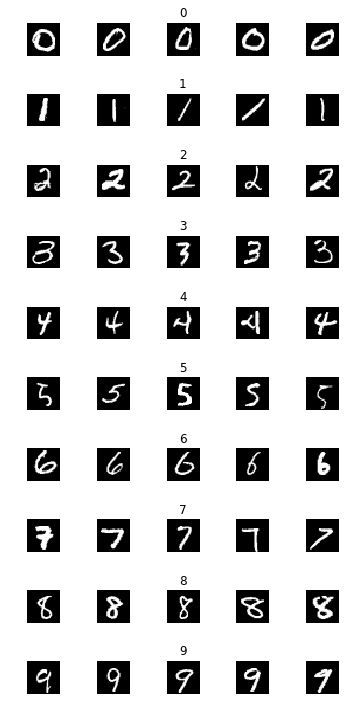

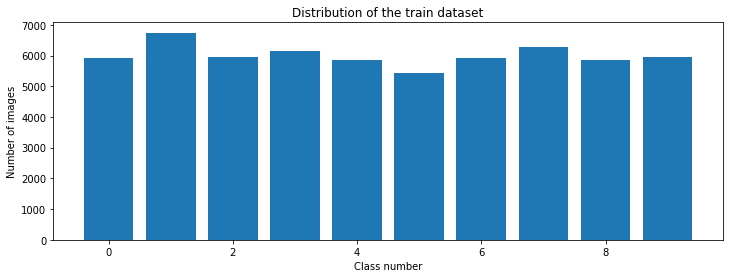

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
from keras.layers import Dropout
np.random.seed(0)


(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))


print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255



In [0]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


In [0]:
def leNet_model():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [4]:
model=leNet_model()
print(model.summary())

W0717 16:39:20.894736 140308706703232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 16:39:20.934741 140308706703232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 16:39:20.943184 140308706703232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 16:39:20.987282 140308706703232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0717 16:39:21.009196 140308706703232 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
__________

W0717 16:39:21.422723 140308706703232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 32s 585us/step - loss: 0.2882 - acc: 0.9083 - val_loss: 0.0513 - val_acc: 0.9833
Epoch 2/10
54000/54000 [==============================] - 31s 574us/step - loss: 0.1067 - acc: 0.9660 - val_loss: 0.0407 - val_acc: 0.9890
Epoch 3/10
54000/54000 [==============================] - 31s 571us/step - loss: 0.0904 - acc: 0.9728 - val_loss: 0.0391 - val_acc: 0.9882
Epoch 4/10
54000/54000 [==============================] - 31s 573us/step - loss: 0.0827 - acc: 0.9735 - val_loss: 0.0361 - val_acc: 0.9900
Epoch 5/10
54000/54000 [==============================] - 31s 573us/step - loss: 0.0718 - acc: 0.9771 - val_loss: 0.0314 - val_acc: 0.9905
Epoch 6/10
54000/54000 [==============================] - 31s 575us/step - loss: 0.0715 - acc: 0.9778 - val_loss: 0.0324 - val_acc: 0.9900
Epoch 7/10
54000/54000 [==============================] - 31s 572us/step - loss: 0.0644 - acc: 0.9799 - val_loss: 0.0

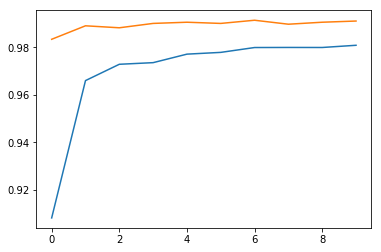

In [5]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

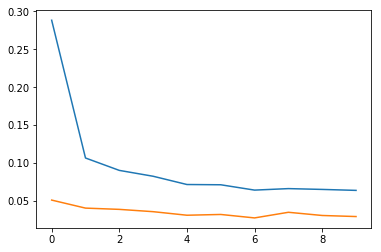

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

predicted digit: [2]


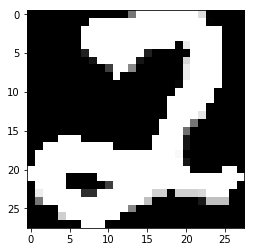

In [7]:

import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = img/255
img = img.reshape(1,28,28,1)

prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

In [8]:
score=model.evaluate(X_test,y_test,verbose=0)
print(score[0])
print(score[1])


0.030501847436488608
0.9901
